# Predicting Canada’s Per Capita Income (2024–2028)

## Introduction

Per capita income is a key economic indicator that reflects the average standard of living and economic health of a nation. With global uncertainties — including inflation, geopolitical tensions, and shifting labor markets — forecasting future income trends is essential for policymakers, economists, and financial planners.

In this notebook, we analyze historical per capita income data in **Canada (1970–2016)** to **forecast income levels from 2024 to 2028** using time series modeling techniques. The dataset provides annual values in U.S. dollars, enabling us to model long-term trends and volatility.

We explore multiple approaches:
- **Linear Regression** for trend-based forecasting
- **Autoregressive (AR) models** on differenced log-income
- **ARIMA models** for robust time series prediction

Our goal is not only to predict but also to quantify uncertainty with **95% confidence intervals**, ensuring actionable and reliable forecasts.

## Objective

The primary objectives of this analysis are:

1. **Data Exploration & Visualization**
   - Plot historical income trends
   - Compute log returns and rolling volatility
   - Identify structural breaks (e.g., oil crises, 2008 recession)

2. **Model Development**
   - Fit a **linear regression model** as a baseline
   - Build an **AR(1) model** on first-differenced log income
   - Apply **ARIMA(1,1,1)** for comprehensive time series forecasting

3. **Model Diagnostics**
   - Test stationarity using **ADF test**
   - Analyze ACF/PACF plots for model selection
   - Check residual normality and autocorrelation

4. **Forecasting**
   - Predict per capita income for **2024–2028**
   - Provide point estimates and **confidence intervals**
   - Visualize forecasts alongside historical data

5. **Interpretation & Recommendations**
   - Compare model performance
   - Discuss economic implications
   - Highlight limitations and assumptions

By the end of this notebook, you will understand how to build, validate, and interpret time series models for real-world economic forecasting.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [ ]:
df.columns


Index(['year', 'per capita income (US$)'], dtype='object')

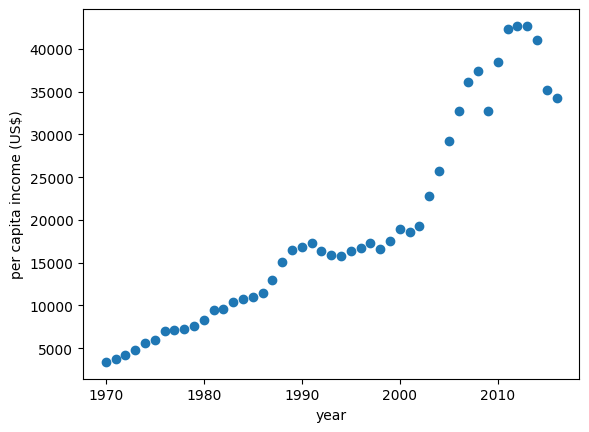

In [ ]:
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.scatter(df.year,df['per capita income (US$)'])

In [ ]:
# autoregression

reg=linear_model.LinearRegression()
reg.fit(df[['year']],df['per capita income (US$)'])

LinearRegression()

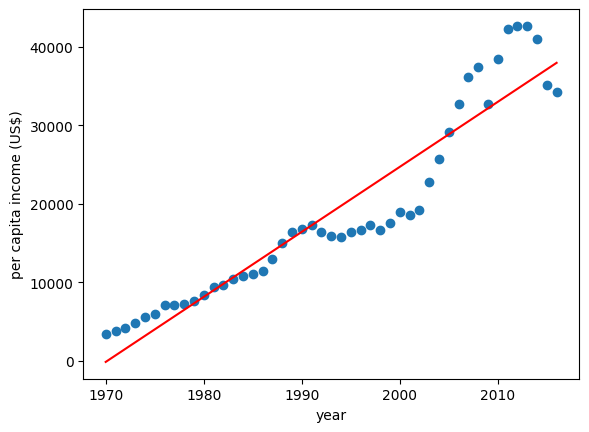

In [ ]:
# plot regression line

plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.scatter(df.year,df['per capita income (US$)'])
plt.plot(df.year,reg.predict(df[['year']]),color='red')

In [ ]:
# predicting next 5 year per capita income

forecast_years = pd.DataFrame({'year': [year for year in range(2017,2029)]})
pred = reg.predict(forecast_years)

df_reg = pd.DataFrame({'year': forecast_years['year'], 'predicted_income': pred})
df_reg.set_index('year', inplace=True)

# Format the 'predicted_income' column to two decimal places
df_reg['predicted_income'] = df_reg['predicted_income'].round(2)

display(df_reg)

,predicted_income
year,
2017,38803.30
2018,39631.76
2019,40460.23
2020,41288.69
2021,42117.16
2022,42945.62
2023,43774.09
2024,44602.55
2025,45431.02


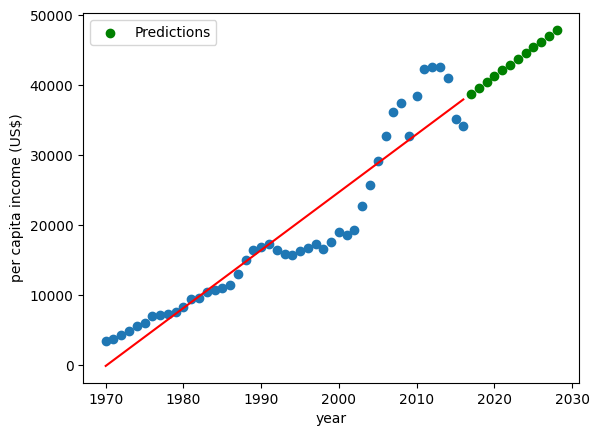

In [ ]:
# plot data + 5 year prediction

plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.scatter(df.year,df['per capita income (US$)'])
plt.plot(df.year,reg.predict(df[['year']]),color='red')
plt.scatter(df_reg.index, df_reg['predicted_income'], color='green', label='Predictions')
plt.legend()
plt.show()

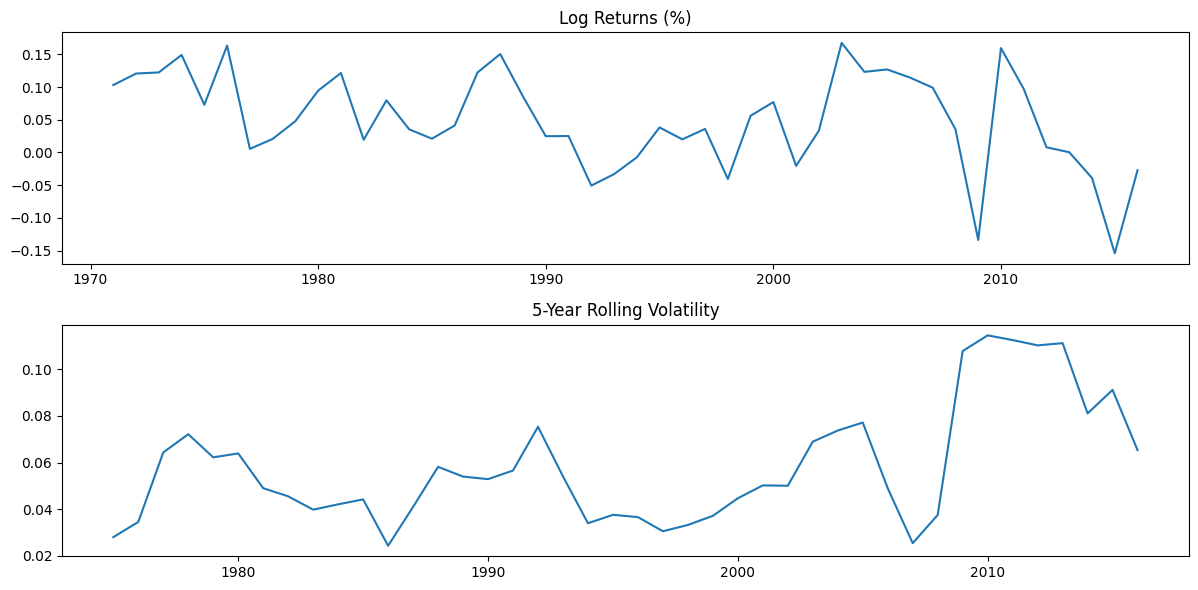

In [ ]:

df['log_returns'] = np.log(df['per capita income (US$)']).diff().dropna() # df['log_returns'] holds the annual growth rate of income, in log (approx. percent) form.



plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(df['year'][1:], df['log_returns'][1:])
plt.title('Log Returns (%)')
plt.subplot(212)
plt.plot(df['year'][1:], df['log_returns'][1:].rolling(5).std())
plt.title('5-Year Rolling Volatility')
plt.tight_layout()


Key Observations:

High volatility during oil crises (1974, 1980)

Financial crisis (2008-09) shows largest spike

Recent stabilization (2010s)

In [ ]:
from statsmodels.tsa.stattools import adfuller

df['log_income'] = np.log(df['per capita income (US$)'])


adf_test = adfuller(df['log_income'].diff().dropna())
print(f'ADF p-value: {adf_test[1]:.4f}')  # Should be <0.05

ADF p-value: 0.0004


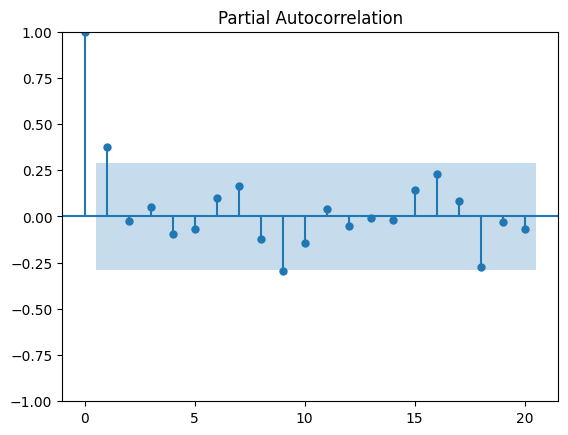

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_pacf(df['log_income'].diff().dropna(), lags=20)
plt.show()

In [ ]:
# Fit AR(1) on differenced log-income
from statsmodels.tsa.ar_model import AutoReg

df['log_income'] = np.log(df['per capita income (US$)'])


model = AutoReg(df['log_income'].diff().dropna(), lags=1, trend='c')
results = model.fit()
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:             log_income   No. Observations:                   46
Model:                     AutoReg(1)   Log Likelihood                  57.473
Method:               Conditional MLE   S.D. of innovations              0.067
Date:                Mon, 30 Jun 2025   AIC                           -108.945
Time:                        10:27:58   BIC                           -103.525
Sample:                             1   HQIC                          -106.925
                                   46                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0291      0.012      2.354      0.019       0.005       0.053
log_income.L1     0.3834      0.139      2.762      0.006       0.111       0.655
                                    Root

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



In [ ]:
# Get last observed value
last_log = df['log_income'].iloc[-1]

# Generate forecasts
forecast_diff = results.predict(start=47, end=58) #Predicted change in log income for each future year.
forecast_log = last_log + forecast_diff.cumsum() #cumulative change

# Convert back to dollars
forecast = np.exp(forecast_log).rename('forecast')
forecast

years = list(range(2017, 2029))  # Years: 2024 to 2028

# Create DataFrame
forecast_df = pd.DataFrame({
    'Year': years,
    'Forecast (USD)': forecast.round(0).astype(int)
}).reset_index(drop=True)

forecast_df

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



,Year,Forecast (USD)
0,2017,35494
1,2018,37055
2,2019,38784
3,2020,40635
4,2021,42590
5,2022,44646
6,2023,46804
7,2024,49067
8,2025,51440
9,2026,53927


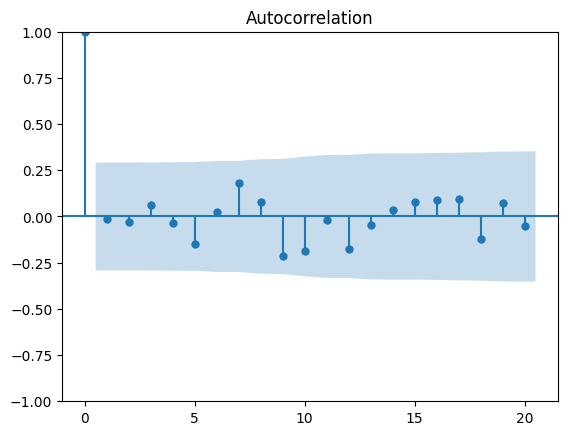

In [ ]:
# Check residuals
residuals = results.resid
plot_acf(residuals, lags=20)
plt.show()

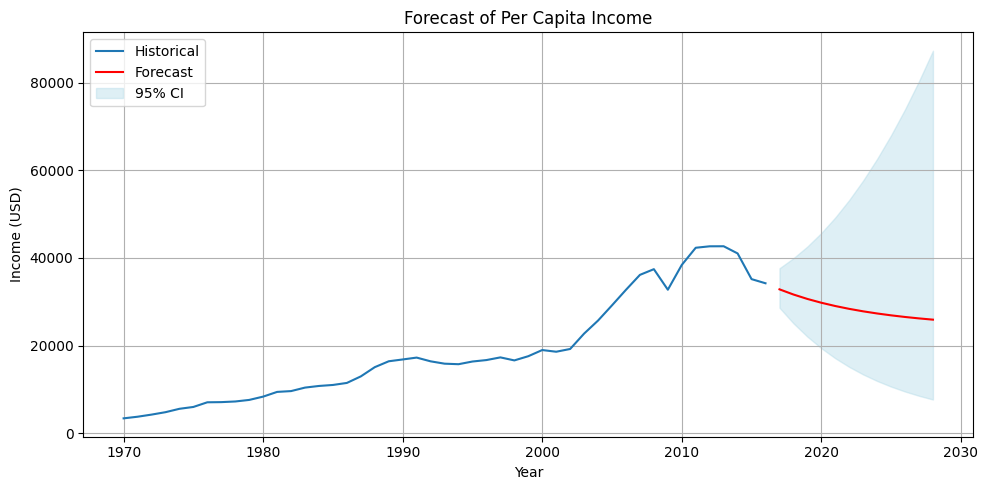

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ts, label='Historical')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_values.index, lower, upper, color='lightblue', alpha=0.4, label='95% CI')
plt.title('Forecast of Per Capita Income')
plt.xlabel('Year')
plt.ylabel('Income (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# AUTOREGRESSION


from statsmodels.tsa.ar_model import AutoReg


# Convert year to datetime index
df.index = pd.to_datetime(df['year'], format='%Y')
ts = df['per capita income (US$)']

# Log-transform and difference
log_ts = np.log(ts)
diff_log = log_ts.diff().dropna() #log difference in income. Because log differences ≈ percentage changes, log(10,500) - log(10,000) ≈ 0.05 → ~5% growth. dropna=drops 1st row NaN.


# Fit model with proper datetime index
model = AutoReg(diff_log, lags=1, trend='c')
results = model.fit()

# Forecast next 5 differences
forecast_start = str(df.index[-1].year + 1)
forecast_diff = results.predict(start=forecast_start, end='2028')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



In [ ]:
# Reconstruct level forecasts
last_log = log_ts.iloc[-1]
forecast_log = last_log + forecast_diff.cumsum()
forecast_values = np.exp(forecast_log)

# Get proper confidence intervals
forecast_obj = results.get_prediction(start=forecast_start, end='2028')
ci = forecast_obj.conf_int()

lower = np.exp(last_log + ci.iloc[:, 0].cumsum())
upper = np.exp(last_log + ci.iloc[:, 1].cumsum())

forecast_df = pd.DataFrame({
    'Year': forecast_values.index.year,  # Extract year from datetime index
    'Forecast (USD)': forecast_values.round(0).astype(int),
    '95% CI Lower': lower.round(0).astype(int),
    '95% CI Upper': upper.round(0).astype(int)
}).reset_index(drop=True)

forecast_df

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



,Year,Forecast (USD),95% CI Lower,95% CI Upper
0,2017,34874,30555,39805
1,2018,36163,27500,47555
2,2019,37753,24885,57275
3,2020,39515,22573,69174
4,2021,41401,20495,83631
5,2022,43393,18616,101148
6,2023,45487,16911,122352
7,2024,47686,15363,148009
8,2025,49991,13958,179050
9,2026,52409,12681,216604


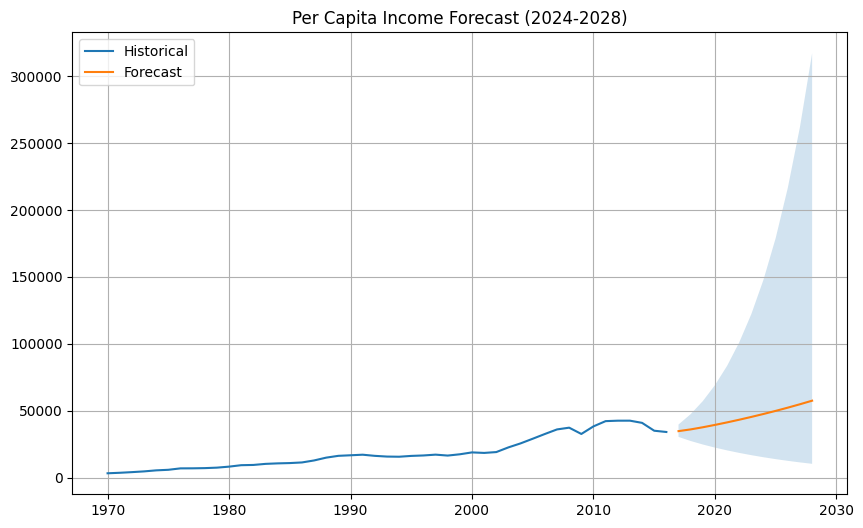

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(ts, label='Historical')
plt.plot(forecast_values, label='Forecast')
plt.fill_between(forecast_values.index, lower, upper, alpha=0.2)
plt.title('Per Capita Income Forecast (2024-2028)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Fit ARIMA(1,1,1) on log-transformed data
model = ARIMA(np.log(ts), order=(1,1,1))  # (p,d,q) = (AR, Differencing, MA)
results = model.fit()
print(results.summary())

                                  SARIMAX Results                                  
Dep. Variable:     per capita income (US$)   No. Observations:                   47
Model:                      ARIMA(1, 1, 1)   Log Likelihood                  56.917
Date:                     Mon, 30 Jun 2025   AIC                           -107.834
Time:                             10:28:00   BIC                           -102.348
Sample:                         01-01-1970   HQIC                          -105.778
                              - 01-01-2016                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8863      0.091      9.771      0.000       0.709       1.064
ma.L1         -0.5109      0.125     -4.080      0.000      -0.756      -0.265
sigma2      

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.



In [ ]:
# Generate forecasts (in log space)
forecast = results.get_forecast(steps=12)
forecast_log = forecast.predicted_mean
forecast_ci_log = forecast.conf_int()

# Convert back to original scale
forecast_values = np.exp(forecast_log).rename('forecast')
lower = np.exp(forecast_ci_log.iloc[:, 0])
upper = np.exp(forecast_ci_log.iloc[:, 1])


forecast_df = pd.DataFrame({
    'Year': forecast_values.index.year,  # Extract year from datetime index
    'Forecast (USD)': forecast_values.round(0).astype(int),
    '95% CI Lower': lower.round(0).astype(int),
    '95% CI Upper': upper.round(0).astype(int)
}).reset_index(drop=True)

forecast_df



,Year,Forecast (USD),95% CI Lower,95% CI Upper
0,2017,32844,28649,37654
1,2018,31664,25098,39947
2,2019,30653,22051,42611
3,2020,29784,19408,45707
4,2021,29035,17118,49248
5,2022,28386,15135,53241
6,2023,27824,13418,57694
7,2024,27335,11932,62619
8,2025,26908,10643,68027
9,2026,26536,9524,73934


Text(0.5, 1.0, 'Residual Normality Check')

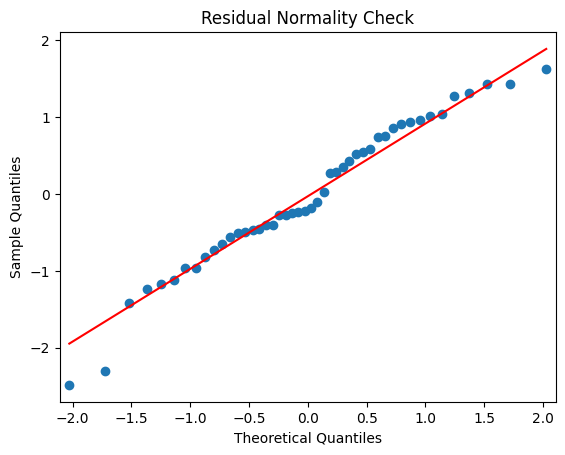

In [ ]:
# sm
import statsmodels.api as sm

residuals = res.std_resid
sm.qqplot(residuals, line='s')
plt.title('Residual Normality Check')

In [ ]:
df=pd.read_csv("canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


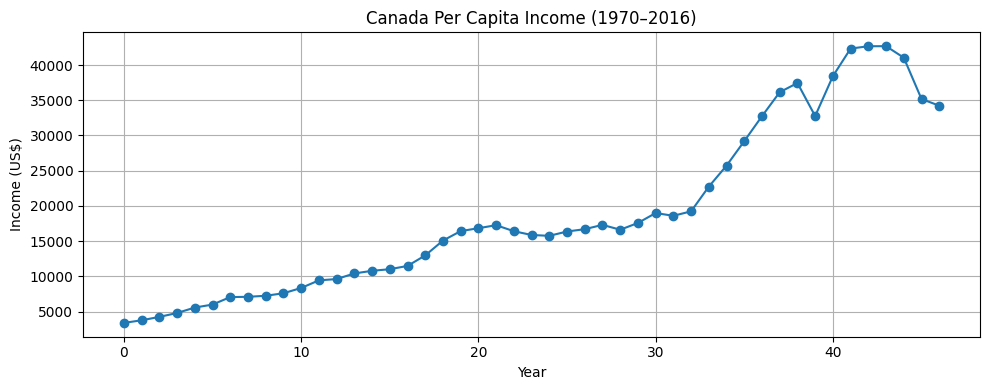

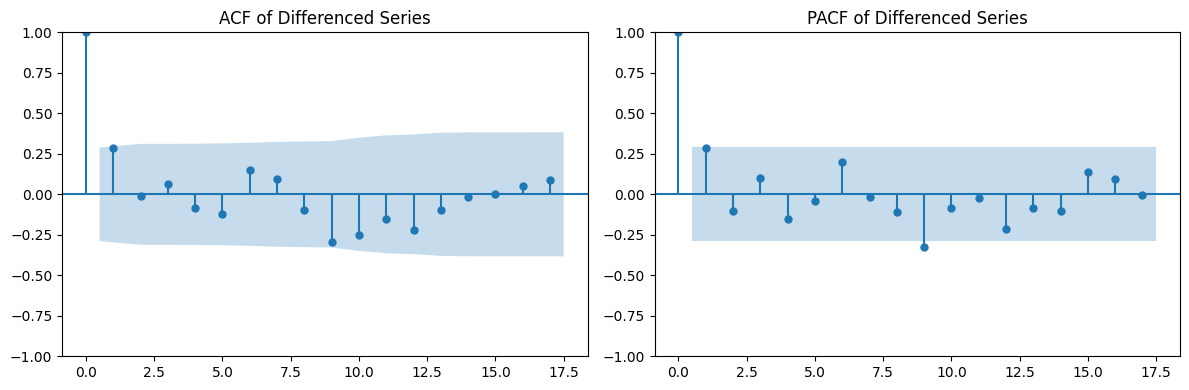

,predicted_income
year,
2017,33341.36
2018,32795.62
2019,32460.17
2020,32253.97
2021,32127.22
2022,32049.31
2023,32001.42
2024,31971.99
2025,31953.89


In [ ]:
# ARIMA


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plt.figure(figsize=(10, 4))
plt.plot(df.index, df['per capita income (US$)'], marker='o', linestyle='-')
plt.title("Canada Per Capita Income (1970–2016)")
plt.xlabel("Year")
plt.ylabel("Income (US$)")
plt.grid(True)
plt.tight_layout()
plt.show()

diff_income = df['per capita income (US$)'].diff().dropna()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(diff_income, ax=axes[0])
plot_pacf(diff_income, ax=axes[1])
axes[0].set_title("ACF of Differenced Series")
axes[1].set_title("PACF of Differenced Series")
plt.tight_layout()
plt.show()

model = ARIMA(df['per capita income (US$)'], order=(1, 1, 1)) # order=(p, d, q) p=1 → Use 1 lag of past values (AR part) , d=1 → Difference the data once (I part) to remove trend, q=1 → Use 1 lag of past errors (MA part)


model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
forecast_years = list(range(2017, 2029))


forecast_df = pd.DataFrame({'year': forecast_years, 'predicted_income': forecast.values.round(2)})
forecast_df.set_index('year', inplace=True)

forecast_df


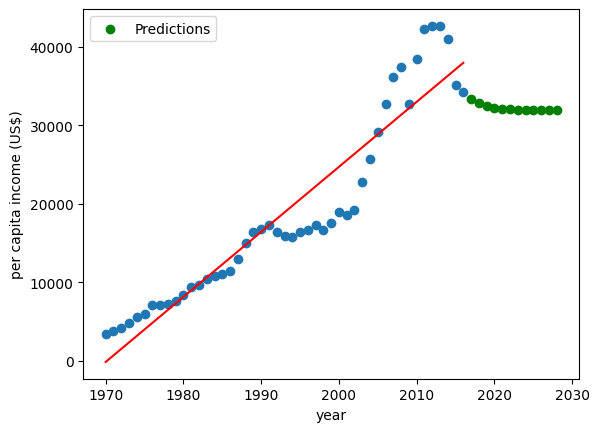

In [ ]:
# plot data + 5 year prediction

plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.scatter(df.year,df['per capita income (US$)'])
plt.plot(df.year,reg.predict(df[['year']]),color='red')
plt.scatter(forecast_df.index, forecast_df['predicted_income'], color='green', label='Predictions')
plt.legend()
plt.show()